directed

acyclic

https://www.geeksforgeeks.org/problems/topological-sort/1

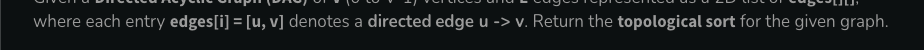

In [ ]:
vector<int> topoSort(int n, vector<vector<int>>& edges) {
    vector<int> al[n];
    for(int i=0;i<edges.size();i++){
        al[edges[i][0]].push_back(edges[i][1]);
        //directed graph
    }
    return top(al,n);
}



vector<int> top(vector<int> al[], int n){   
    vector<int> ans;
    vector<int> ind(n,0);
    for(int i=0;i<n;i++){
        for(int x: al[i]){
            ind[x]++;
        }
    }

    queue<int> q;
    // doing the first insertion in the queue
    for(int i=0;i<n;i++){
        if(ind[i]==0){
            q.push(i);
        } 
    }

    while(q.size()){
        int x=q.front();
        q.pop();
        ans.push_back(x);
        for(int y: al[x]){
            ind[y]--;
            if(ind[y]==0){
                q.push(y);
            } 
        }
    }  
    return ans;
}

In [ ]:
//archieved
vector<int> topoSort(int n, vector<vector<int>>& edges) {
    vector<int> al[n];
    for(int i=0;i<edges.size();i++){
        al[edges[i][0]].push_back(edges[i][1]);
        //directed graph
    }
    return top(al,n);
}



vector<int> top(vector<int> al[], int n){   
    vector<int> ans;
    vector<int> ind(n,0);
    for(int i=0;i<n;i++){
        for(int j=0;j<al[i].size();j++){
            ind[al[i][j]]++;
        }
    }

    queue<int> q;
    // doing the first insertion in the queue
    for(int i=0;i<n;i++){
        if(ind[i]==0){
            q.push(i);
        } 
    }

    while(q.size()){
        int x=q.front();
        q.pop();
        ans.push_back(x);
        for(int i=0;i<al[x].size();i++){
            ind[al[x][i]]--;
            if(ind[al[x][i]]==0){
                q.push(al[x][i]);
            } 
        }
    }  
    return ans;
}

If size of topocal sort  is less than n then there is a cycle, cant be topological sorted

https://leetcode.com/problems/find-eventual-safe-states/description/    


1. terminal node if there are no outgoing edges
2. terminal nodes will be safe node
3. safe node if every possible path starting from that node leads to a terminal node or another safe    node     


return safe nodes

reverse the edges    
1. a node only having incoming nodes (terminal nodes) will become a node with only outgoing edge
((this is the starting point of topological sort))     
2. a node with only outgoing edges will become a node with only incoming edges

In [ ]:
class Solution {
    public:
    
    vector<int> top(vector<int> al[], int n){   
        vector<int> ans;
        vector<int> ind(n,0);
        for(int i=0;i<n;i++){
            for(int x: al[i]){
                ind[x]++;
            }
        }
    
        queue<int> q;
        // doing the first insertion in the queue
        for(int i=0;i<n;i++){
            if(ind[i]==0){
                q.push(i);
            } 
        }
    
        while(q.size()){
            int x=q.front();
            q.pop();
            ans.push_back(x);
            for(int y: al[x]){
                ind[y]--;
                if(ind[y]==0){
                    q.push(y);
                } 
            }
        }  
        return ans;
    }
    
        vector<int> eventualSafeNodes(vector<vector<int>>& al) {
            int n=al.size();
            vector<int> nal[n];
            for(int i=0;i<n;i++){
                for(int x: al[i]){
                    //doing reverse
                    nal[x].push_back(i);
                } 
            }
    
    
            vector <int> ans=top(nal,n);
            sort(ans.begin(),ans.end());
            return ans;
        }
    };